# HW02: Tokenization

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

In [6]:
#Import the AG news dataset (same as hw01)
#Download them from here 
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

--2023-03-09 17:18:00--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  28.10M   163MB/s    in 0.2s    

2023-03-09 17:18:01 (163 MB/s) - ‘train.csv.1’ saved [29470338/29470338]



,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


## Preprocess Text

In [51]:
import spacy
dfs = df.sample(50)
nlp = spacy.load('en_core_web_sm')

##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens

def get_sentences(text):

    doc = nlp(text)
    sentences = list(doc.sents)

    return sentences

def get_tokens(text):
    doc = nlp(text)
    tokens = [token for token in doc]

    return tokens

dfs['sentences'] = dfs['text'].apply(get_sentences)

dfs['tokens'] = dfs['text'].apply(get_tokens)

##TODO print the first sentence of the first document in your sample

print(dfs['sentences'].iloc[0][0])



EU irked by Turkish adultery law The EU enlargement commissioner says  Turkey's plans to make adultery a crime could affect its chances of joining the EU.


In [52]:
dfs.head()

,label,title,lead,text,sentences,tokens
22844,world,EU irked by Turkish adultery law,The EU enlargement commissioner says Turkey's...,EU irked by Turkish adultery law The EU enlarg...,"[(EU, irked, by, Turkish, adultery, law, The, ...","[EU, irked, by, Turkish, adultery, law, The, E..."
86699,world,Japan on alert as suspected Chinese sub detect...,AFP - Japan was on alert after a suspected Chi...,Japan on alert as suspected Chinese sub detect...,"[(Japan, on, alert, as, suspected, Chinese, su...","[Japan, on, alert, as, suspected, Chinese, sub..."
64196,sport,ICC: Test status for Bangladesh and Zimbabwe i...,LAHORE: The International Cricket Council yest...,ICC: Test status for Bangladesh and Zimbabwe i...,"[(ICC, :, Test, status, for, Bangladesh, and, ...","[ICC, :, Test, status, for, Bangladesh, and, Z..."
41998,world,Lubbers set for new Darfur talks,The UN refugee chief is to have what could be ...,Lubbers set for new Darfur talks The UN refug...,"[(Lubbers, set, for, new, Darfur, talks, , Th...","[Lubbers, set, for, new, Darfur, talks, , The..."
91910,sport,Griffin Gets Good News,Th Redskins' defense receives good news on Cor...,Griffin Gets Good News Th Redskins' defense re...,"[(Griffin, Gets, Good, News, Th, Redskins, ', ...","[Griffin, Gets, Good, News, Th, Redskins, ', d..."


In [53]:
##TODO create a new column with tokens in lowercase (x.lower()), without punctuation tokens (x.is_punct), stopwords (x.is_stop), and digits (x.is_digit)


def get_processed_tokens(text):

    tokens = [token.text.lower() for token in text if not token.is_digit and not token.is_punct and not token.is_stop]

    return tokens

dfs['tokens_processed'] = dfs['tokens'].apply(get_processed_tokens)

In [54]:
dfs['tokens_processed'].head()

22844    [eu, irked, turkish, adultery, law, eu, enlarg...
86699    [japan, alert, suspected, chinese, sub, detect...
64196    [icc, test, status, bangladesh, zimbabwe, safe...
41998    [lubbers, set, new, darfur, talks,  , un, refu...
91910    [griffin, gets, good, news, th, redskins, defe...
Name: tokens_processed, dtype: object

In [55]:
##TODO print the tokens (x.lemma_) and the dependency labels (x.dep_ ) of the first sentence of the first document (doc.sents)

In [56]:
tokens = get_tokens(dfs['text'].iloc[0])
tokens = [token for token in tokens if not token.is_digit and not token.is_punct and not token.is_stop]

lemma = [token.lemma_ for token in tokens]
dep = [token.dep_ for token in tokens]

for l, d in zip(lemma, dep):
    print(l, d)

EU nsubj
irk acl
turkish amod
adultery compound
law pobj
EU compound
enlargement compound
commissioner nsubj
say ROOT
  dep
Turkey poss
plan dobj
adultery nsubj
crime nsubj
affect ccomp
chance dobj
join pcomp
EU dobj


### Named Entities

Let's compute the ratio of named entities starting with a capital letter, e.g. if we have "University of Chicago" as a NE, "University" and "Chicago" are capitalized, "of" is not, thus the ratio is 2/3.

In [ ]:
##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)

def get_entities(text):
    doc = nlp(text)
    entities = [entity for entity in doc.ents]

    return entities


entities = dfs['text'].apply(get_entities)

def get_ent_ratio(ents):
    ratios = []
    for ent in ents:
        cap_ent = 0
        
        for word in ent:
            if word.text[0].isupper():
                cap_ent += 1
        
        if len(ent) > 0:
            ratios.append(cap_ent/len(ent))
        else:
            ratios.append(0.0)

    return ratios

ent_ratios = entities.apply(get_ent_ratio)

for ent, rat in zip(entities, ent_ratios):
    print(ent)
    print(rat)



In [61]:
##TODO print the ratio of capitalized tokens not being part of a named entity span (have no token.ent_type_)
# e.g. "The dog barks" = 1/3; 3 tokens, only "The" is capitalized

def get_ratio_cap_tokens_not_ent(text):
    
    target_tokens = [token for token in text if not token.ent_type_ and token.text[0].isupper()]

    if len(text) > 0:
        ratio = len(target_tokens) / len(text)
    else: ratio = 0.0

    return ratio


ratio_cap_tokens_not_ent = dfs['tokens'].apply(get_ratio_cap_tokens_not_ent)

ratio_cap_tokens_not_ent.head(10)


22844     0.034483
86699     0.041667
64196     0.097561
41998     0.071429
91910     0.212121
84751     0.187500
52370     0.035714
110842    0.239130
20554     0.196721
75197     0.029412
Name: tokens, dtype: float64

In [71]:
##TODO print the ratio of capitalized tokens not being a named entity and not being the first token in a sentence
# e.g. "The dog barks" = 0; 3 tokens, "The" is capitalized but the starting token of a sentence, no other tokens are capitalized.

def get_ratio_cap_token_not_ent_not_start_sentence(text):

    nb_tokens = 0 
    target_tokens = []

    for sentence in text:
        nb_tokens += len(sentence)

        target_tokens_sent = [token for token in sentence[1:] if not token.ent_type_ and token.text[0].isupper()]

        target_tokens.extend(target_tokens_sent)

    if nb_tokens > 0:
        ratio = len(target_tokens) /nb_tokens
    else: ratio = 0.0

    return ratio

ratio_cap_tokens_not_ent_not_start = dfs['sentences'].apply(get_ratio_cap_token_not_ent_not_start_sentence)

ratio_cap_tokens_not_ent_not_start.head(10)

#print(ratio_cap_tokens_not_ent == ratio_cap_tokens_not_ent_not_start)



22844      True
86699      True
64196     False
41998     False
91910     False
84751      True
52370      True
110842     True
20554     False
75197      True
37965      True
52624      True
79198      True
10399     False
7347      False
83543     False
12624     False
63905      True
30416      True
36814      True
19091      True
98309     False
82551     False
94397     False
51993     False
7449      False
108576    False
103513     True
17555     False
113280    False
55267      True
38723      True
99605     False
112227     True
1505      False
1168      False
64368     False
88192     False
7321      False
1782      False
53332     False
62007     False
75938      True
55098     False
68209     False
9462      False
68723     False
45105      True
6371      False
116901    False
dtype: bool


Give an example of a capitalized token in the data which is neither a named entity nor at the start of a sentence. What could be the reason the token is capitalized (one sentence)?

no clue

## Term Frequencies

In [ ]:
print(df['label'].value_counts())

sci/tech    30000
sport       30000
world       30000
business    29999
Name: label, dtype: int64


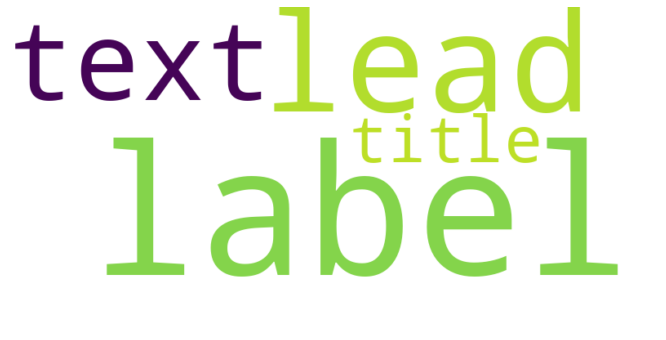

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

##TODO using the whole sample, produce a world cloud with bigrams for label == business using tfidf frequencies

df_bus = df.loc[df['label'] == 'business']


tfidf.fit(df_bus)


feature_names = tfidf.get_feature_names_out()
tfidf_scores = tfidf.idf_

# Create a dictionary with the feature names and their corresponding TF-IDF scores
wordcloud_dict = dict(zip(feature_names, tfidf_scores))

# Create a word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(wordcloud_dict)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




## Supervised Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

##TODO compute the number of words per document (excluding stopwords)

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

en_stop_words = stopwords.words('english')

text_no_stop_words = df['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in en_stop_words]))
num_words_per_document = text_no_stop_words.apply(lambda x: len(x.split()))

num_words_per_document.head()

##TODO get the most predictive features of the number of words per document using first f_class and then chi2


# f_classif
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(tfidf.fit_transform(df['text']), num_words_per_document)
feature_names = tfidf.get_feature_names_out()
selected_features_fclass = [feature_names[i] for i in selector.get_support(indices=True)]
print(selected_features_fclass)


# chi2
selector = SelectKBest(chi2, k=20)
X_new = selector.fit_transform(tfidf.fit_transform(df['text']), num_words_per_document)
feature_names = tfidf.get_feature_names_out()
selected_features_chi2 = [feature_names[i] for i in selector.get_support(indices=True)]
print(selected_features_chi2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['aspx ticker', 'com fullquote', 'fullquote', 'fullquote aspx', 'fullquote gt', 'gt', 'href', 'href http', 'http', 'http www', 'investor reuters', 'lt', 'lt href', 'quickinfo', 'quickinfo fullquote', 'stocks quickinfo', 'strong', 'target stocks', 'www', 'www investor']
['39', 'fullquote', 'gt', 'href', 'href http', 'http', 'http www', 'investor reuters', 'lt', 'lt gt', 'lt href', 'quickinfo', 'quickinfo fullquote', 'reuters', 'reuters com', 'stocks quickinfo', 'strong', 'target stocks', 'www', 'www investor']


Are the results different? What could be a reason for this? 

The f_classif assumes a normal distribution of the data and that the variance of y is equal across all features. chi2 however assumes the data to be categorical. The results are not equal because of the characteristics of the data.

## Huggingface Tokenizers

In [ ]:
# # we use distilbert tokenizer
#!pip install transformers
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

##TODO tokenize the sentences in the sampled dataframe (dfs) using the DisilBertTokenizer

# I used 'text' instead of sentences to avoid having to iterate through every documents.
# To consider multiple sentences however, the 'add_special_tokens' is activated, which, as far as I understood,
# accounts for multiple sentences in the input
tokenized_sentences = dfs['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


##TODO what is the type/token ratio from this tokenizer (number_of_unqiue_token_types/number_of_tokens)?

# Number of unique token types
num_unique_tokens = len(set(tokenizer.get_vocab().keys()))

# Total number of tokens
num_tokens = sum([len(sentence) for sentence in tokenized_sentences])

# type/token ratio
type_token_ratio = num_unique_tokens / num_tokens

print(type_token_ratio)

##TODO what is the amount of subword tokens returned by the huggingface tokenizer? hint: each subword token starts with "#"

tokenized_sentences = [tokenizer.tokenize(sentence) for sentence in df['text']]

# Sum of subword tokens starting with '#'
num_subword_tokens = sum([1 for sentence in tokenized_sentences for token in sentence if token.startswith('#')])

print(num_subword_tokens)



12.011806375442738
513340


# Parsing

In [ ]:
import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df = df.sample(n=10000) # # only use 10K datapoints
df.head()

,label,title,lead,text
78333,world,Eight Marines dead in suicide car bombing,A suicide attacker detonated a car bomb yester...,Eight Marines dead in suicide car bombing A su...
29574,sport,"UPDATE 1-Blackburn chance too good to miss, sa...",New Blackburn Rovers manager Mark Hughes says ...,"UPDATE 1-Blackburn chance too good to miss, sa..."
112831,sport,Diamondbacks Keep Busy; Ortiz Heading Home,"ANAHEIM, Calif., (Sports Network) - The Arizo...",Diamondbacks Keep Busy; Ortiz Heading Home AN...
66261,business,Crude price up slightly as market braces for U...,Crude oil prices rose slightly Wednesday after...,Crude price up slightly as market braces for U...
48580,business,Accountant testifies he lied about Enron barge...,A former Enron accountant testified Thursday t...,Accountant testifies he lied about Enron barge...


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
#TODO preprocess the corpus using spacy

def preprocess(text):
    doc = nlp(text)
    tokens = [token for token in doc if not token.is_stop and token.is_punct]
    return tokens

df['preprocessed_text'] = df['text'].apply(preprocess)

### Information Extraction

In [ ]:
def extract_subject_verb_pairs(sent):
    subjs = [w for w in sent if w.dep_ == "nsubj"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subjs]
    return pairs
##TODO extract the subject-verbs pairs and print the result for the second document

#text = "This is a sample sentence to test the tokenizer."
#tokens = [token for token in nlp(text) if not token.is_stop and token.is_punct]

#print(extract_subject_verb_pairs(tokens))

sub_verb_pairs = df['preprocessed_text'].apply(extract_subject_verb_pairs)

from collections import Counter
counter = Counter()

##TODO create a list ranking the most common pairs and print the first 10 items

pairs = [tuple(pair) for pair in sub_verb_pairs]

nb_occ_pairs = Counter(pairs)

sorted_pairs = sorted(nb_occ_pairs.items(), key=lambda x: x[1], reverse=True)

print(nb_occ_pairs.most_common(10))

[((), 9959), ((('-', 'say'),), 3), ((('.', 'score'),), 2), ((('-', 'talk'),), 2), ((('-', 'get'),), 2), ((('!', 'buy'),), 1), ((('.', 'urge'),), 1), ((('-', 'come'),), 1), ((('.', 'be'),), 1), ((('.', 'throw'),), 1)]


In [ ]:
##TODO do the same for verbs-object pairs ('dobj')

def extract_verbs_obj_pairs(sent):
    subjs = [w for w in sent if w.dep_ == "dobj"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subjs]
    return pairs

verb_obj_pairs = df['preprocessed_text'].apply(extract_verbs_obj_pairs)

##TODO create a list ranking the most common pairs and print the first 10 items

pairs = [tuple(pair) for pair in verb_obj_pairs]

nb_occ_pairs = Counter(pairs)

sorted_pairs = sorted(nb_occ_pairs.items(), key=lambda x: x[1], reverse=True)

print(nb_occ_pairs.most_common(10))

[((), 9927), ((('-', 'send'),), 3), ((('.', 'lead'),), 3), ((('-', 'win'),), 3), ((('-', 'claim'),), 2), ((('-', 'receive'),), 2), ((('.', 'defeat'),), 2), ((('#', 'halt'),), 1), ((('-', 'reach'),), 1), ((('-', 'launch'),), 1)]


In [ ]:
##TODO do the same for adjectives-nouns pairs ('amod')

def extract_adj_nouns_pairs(sent):
    subjs = [w for w in sent if w.dep_ == "amod"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subjs]
    return pairs

adj_nouns_pairs = df['preprocessed_text'].apply(extract_adj_nouns_pairs)

##TODO create a list ranking the most common pairs and print the first 10 items

pairs = [tuple(pair) for pair in adj_nouns_pairs]

nb_occ_pairs = Counter(pairs)

sorted_pairs = sorted(nb_occ_pairs.items(), key=lambda x: x[1], reverse=True)

print(nb_occ_pairs.most_common(10))

[((), 9763), ((('-', 'drug'),), 6), ((('-', 'campaign'),), 4), ((('-', 'law'),), 4), ((('-', 'president'),), 4), ((('-', 'trade'),), 3), ((('-', 'protest'),), 3), ((('-', 'group'),), 3), ((('-', 'ap'),), 3), ((('-', 'minister'),), 3)]


### Exploring cross label dependencies

In [ ]:
##TODO extract all the subject-verbs and verbs-object pairs for the verb "rise"

def extract_verb_pairs(sent, verb):
    subj_verb = [w for w in sent if w.dep_ == "nsubj" and w.text == verb]
    subj_verb_pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subj_verb]
    
    verb_obj = [w for w in sent if w.dep_ == "dobj" and w.text == verb]
    verb_obj_pairs = [(w.head.lemma_.lower(), w.lemma_.lower()) for w in verb_obj]
    
    return subj_verb_pairs, verb_obj_pairs

verb = "rise"
subj_verb_pairs = []
verb_obj_pairs = []

# Multiple sentences lead to errors
preprocessed_text = df['preprocessed_text'].apply(lambda x: ' '.join([token.text for token in x]))

for doc in nlp.pipe(preprocessed_text):
    for sent in doc.sents:
        sv_pairs, vo_pairs = extract_verb_pairs(sent, verb)
        subj_verb_pairs.extend(sv_pairs)
        verb_obj_pairs.extend(vo_pairs)


, .


In [ ]:
print(verb_obj_pairs)

[]


In [ ]:
##TODO for each label create a list ranking the most common subject-verbs pairs and one for the most common verbs-object pairs
##TODO print the 10 most common pairs for each of the two lists for the labels "world" and "sci/tech"

In [ ]:
def extract_sub_verb_pairs(sent):
    subj_verb = [w for w in sent if w.dep_ == "nsubj"]
    subj_verb_pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subj_verb]
    
    verb_obj = [w for w in sent if w.dep_ == "dobj"]
    verb_obj_pairs = [(w.head.lemma_.lower(), w.lemma_.lower()) for w in verb_obj]
    
    return subj_verb_pairs, verb_obj_pairs


labels = [label[0] for label in df.groupby('label')['label'].unique()]

label_pairs = {}

for i, label in enumerate(df.groupby('label')['preprocessed_text']):
    label_pairs['{}_sub_verb'.format(labels[i])] = label[1].apply(lambda x: extract_verb_pairs(x)[0])
    label_pairs['{}_verb_sub'.format(labels[i])] = label[1].apply(lambda x: extract_verb_pairs(x)[1])

print_labels = ['world', 'sci/tech']

for label in label_pairs.keys():
    if label in print_labels:
        counter = Counter(label_pairs[label])
        print('{}: {}'.format(label, counter.most_common(10)))

dict_keys(['business_sub_verb', 'business_verb_sub', 'sci/tech_sub_verb', 'sci/tech_verb_sub', 'sport_sub_verb', 'sport_verb_sub', 'world_sub_verb', 'world_verb_sub'])


In [ ]:
### The functions would always give back empty lists and I was not able to find out why. In a previous question there was 
### similar problem, which however could be solved by using tuple(pairs). This one however remained